In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as st
import math
import matplotlib.pyplot as plt
import seaborn as sns
%precision 3

sns.set()

# 統計学入門

## 第1章

In [254]:
# gdpファイルの読み込み
df = pd.read_csv('chintai.csv', encoding = 'utf-8')

In [255]:
#rawデータの基本統計量を確認
print('chintaiデータの基本統計量')
print('----------------------------------------------------------------')
print(df.info())
print(df.describe())
print('----------------------------------------------------------------\n')
df.head()

chintaiデータの基本統計量
----------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   距離      100 non-null    int64 
 1   広さ      100 non-null    int64 
 2   構造      100 non-null    object
 3   方角      100 non-null    object
 4   家賃      100 non-null    int64 
 5   家賃カテゴリ  100 non-null    object
dtypes: int64(3), object(3)
memory usage: 4.8+ KB
None
               距離          広さ             家賃
count  100.000000  100.000000     100.000000
mean   512.900000   29.460000   91810.000000
std    200.687178    5.160886   23738.344296
min     80.000000   14.000000   36000.000000
25%    370.000000   26.000000   72500.000000
50%    515.000000   30.000000   92000.000000
75%    650.000000   33.000000  109250.000000
max    950.000000   40.000000  161000.000000
----------------------------------------------------------------



,距離,広さ,構造,方角,家賃,家賃カテゴリ
0,850,37,木造,西,81000,中
1,580,16,非木造,南,57000,低
2,700,35,非木造,南,116000,高
3,950,29,木造,西,51000,低
4,870,36,非木造,南,114000,高


In [256]:
# カラム名の変更
df = df.rename(columns={'距離':'distance',
                        '広さ':'size',
                        '構造':'stracture',
                        '方角':'direction',
                        '家賃':'price',
                        '家賃カテゴリ':'price_category'})

In [257]:
# 算術平均
np.mean(df['price'])

91810.0

In [258]:
# 幾何平均
# st.gmean(df['price'][2:])

In [259]:
# 標準偏差
price_std = np.std(df['price'])
price_mean = np.mean(df['price'])

# 偏差値
room_price = 100000
print('priceの偏差値は',50+10*(room_price - price_mean) /price_std)

priceの偏差値は 53.467495291354446


In [260]:
# 偏差値を列に追加する
df['price_std'] = np.round(50+10*(df['price'] - price_mean) / price_std,2)
df.head()

,distance,size,stracture,direction,price,price_category,price_std
0,850,37,木造,西,81000,中,45.42
1,580,16,非木造,南,57000,低,35.26
2,700,35,非木造,南,116000,高,60.24
3,950,29,木造,西,51000,低,32.72
4,870,36,非木造,南,114000,高,59.39


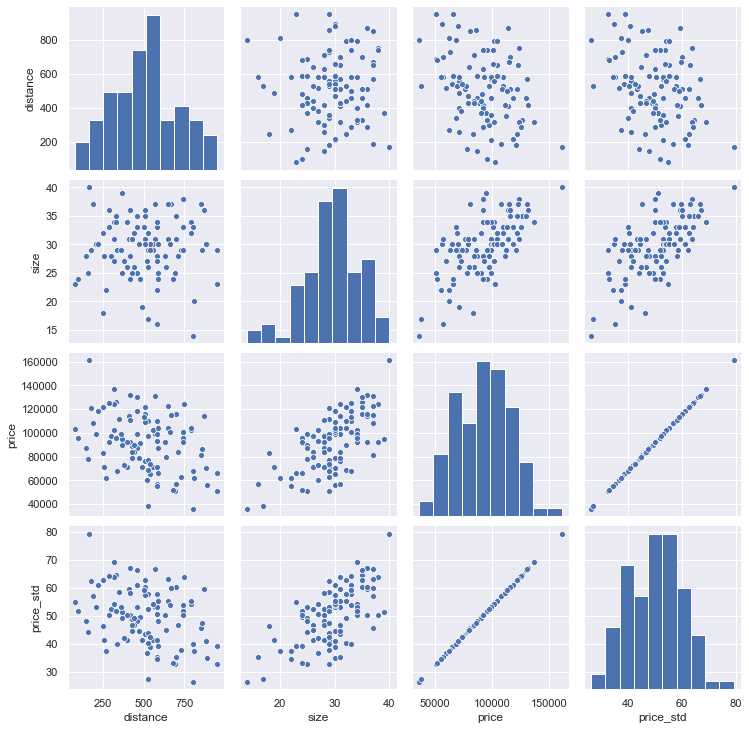

In [261]:
sns.pairplot(df)

In [262]:
# 欠損値を埋める
df['price'] = df['price'].fillna(df['price'])

In [263]:
# 相関係数
x = df['size']
y = df['price']
x_std = np.std(x)
y_std = np.std(y)

np.corrcoef(x,y)

array([[1.   , 0.648],
       [0.648, 1.   ]])

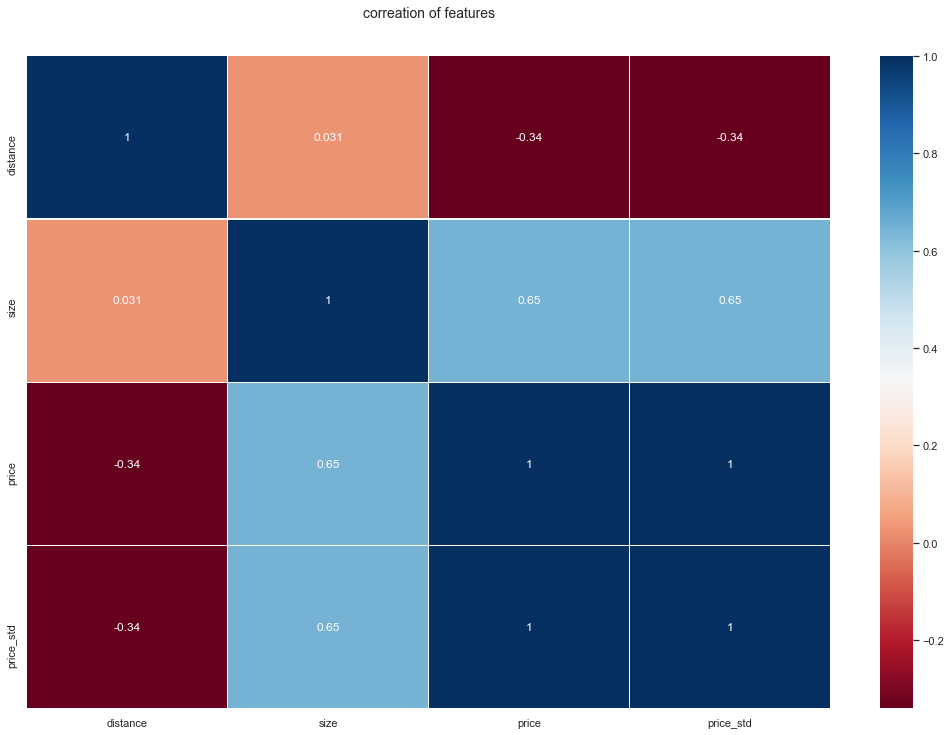

In [264]:
# 相関行列のヒートマップ
df_drop = df.drop(columns =['stracture','direction','price_category'])
colormap = plt.cm.RdBu
plt.figure(figsize=(18,12))
plt.title('correation of features',y=1.05,size =14)
sns.heatmap(df_drop.astype(float).corr(),linewidths=0.1,vmax=1.0,
            cmap=colormap,linecolor='white',annot= True)

In [265]:
# 分散
y_var = np.var(y)
print(y_var)

557873900.0


In [266]:
# 分散の求め方 1
tmp_var = 0
y_ave = np.mean(y)

for i in y:
    tmp_var += (i-y_ave)**2
y_var = tmp_var / len(y)
print(y_var)

#分散の求め方2
t = sum([i**2 for i in y]) / len(y)
y_var2 = t - y_ave**2
print(y_var2)

557873900.0
557873900.0


In [267]:
# 最小二乗法
## y = a + bx 
co_tmp = 0
x_ave = np.mean(x)
y_ave = np.mean(y)

for (i,j) in zip (x,y):
    co_tmp += ((i-x_ave)*(j-y_ave))

covariance = co_tmp / len(x)


b = round(covariance / np.var(x),2)
a = y_ave - b*x_ave

print('a =',a,'\n'
      'b =',b)

a = 3997.3996000000043 
b = 2980.74


In [268]:
# 標準化
## z = (xi - x_ave) / x_std
print('家賃の平均値は',y_ave)
print('10万円の家賃を標準化すると', (100000 - y_ave)/y_std)

家賃の平均値は 91810.0
10万円の家賃を標準化すると 0.34674952913544427


In [269]:
# 変動係数 ※変異係数ともいう
cv = y_std / y_ave
cv

0.2572634174042798

## 対数の計算

In [270]:
# 自然対数eのべき乗
math.exp(2)

7.389

In [271]:
# 対数関数を計算するには
math.log(9,3)

2.000

In [272]:
# 何も指定しないと自然対数が底となる
math.log(math.exp(2))

2.000

In [273]:
# 度数分布表の作成
# ステージスの公式
## データ数ｎの適当なきゅうの回数はmとする
m = 1+math.log10(len(y)) / math.log10(2) 
m

7.644

## 第3章回帰分析と相関分析

In [274]:
# 最小二乗法
## y = a + bx 
co_tmp = 0
x_ave = np.mean(x)
y_ave = np.mean(y)

for (i,j) in zip (x,y):
    co_tmp += ((i-x_ave)*(j-y_ave))

covariance = co_tmp / len(x)


b = round(covariance / np.var(x),2)
a = y_ave - b*x_ave

print('a =',a,'\n'
      'b =',b)

a = 3997.3996000000043 
b = 2980.74


In [276]:
# 決定係数
from sklearn.metrics import r2_score
print('xのyに対する決定係数は',np.corrcoef(y,x)[0,1]**2)
# r^2 = Sr^2 / Sy^2 = Sy^2 - Sy・x^2 / Sy^2 = 1 - Sy・x^2 / Sy^2
Syx2 = sum([(i-(a+j*b))**2 for (i,j) in zip (y,x)]) / len(y)
r2 = 1 - Syx2 / y_var
r2

xのyに対する決定係数は 0.4199489869689542


0.4199489869687473

## 重回帰分析

In [277]:
from sklearn.linear_model import LinearRegression

In [278]:
df.columns

Index(['distance', 'size', 'stracture', 'direction', 'price', 'price_category',
       'price_std'],
      dtype='object')

In [291]:
# ダミー変数への変換
# df_merge_train = pd.get_dummies(df_merge_train,drop_first = True)
df_tmp = df.drop(columns =['price_category'])
df_tmp= pd.get_dummies(df_tmp,drop_first = True)
x = df_tmp.drop(columns =['price','price_std'])
y = df_tmp['price']

In [280]:
# 重回帰モデルの学習
lr_model = LinearRegression()
lr_model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [281]:
features = pd.DataFrame({'features':x.columns,'coefficient':lr_model.coef_})
features.loc[5] = ['intercept',lr_model.intercept_]
features

,features,coefficient
0,distance,-43.721740
1,size,3109.476925
2,stracture_非木造,29079.618243
3,direction_東,-4225.099645
4,direction_西,-4469.217237
5,intercept,7558.757560


In [282]:
# 決定係数
lr_model.score(x,y)

0.9465045725580867

In [293]:
X

,const,distance,size,stracture_非木造,direction_東,direction_西
0,1.0,850,37,0,0,1
1,1.0,580,16,1,0,0
2,1.0,700,35,1,0,0
3,1.0,950,29,0,0,1
4,1.0,870,36,1,0,0
...,...,...,...,...,...,...
95,1.0,640,26,1,1,0
96,1.0,500,33,1,0,0
97,1.0,860,29,1,0,0
98,1.0,530,26,1,0,0


In [292]:
import statsmodels.api as sm
X = sm.add_constant(x)
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     332.6
Date:                Wed, 25 Mar 2020   Prob (F-statistic):           3.96e-58
Time:                        12:12:17   Log-Likelihood:                -1002.5
No. Observations:                 100   AIC:                             2017.
Df Residuals:                      94   BIC:                             2033.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7558.7576   3834.449      1.971

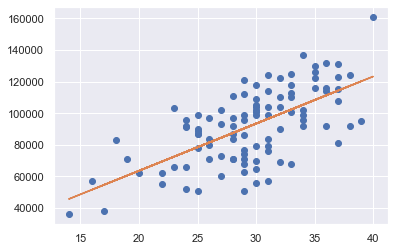

In [289]:
# 単回帰の可視化
x = df_tmp['size']
y = df_tmp['price']

X = sm.add_constant(x)
model = sm.OLS(y,X)

results= model.fit()
a = results.params[0]
b = results.params[1]

plt.plot(x,y,'o')
plt.plot(x, a+b*x)
plt.show()

# 第5・6章確率変数と主な確率分布

## 積分

In [38]:
# 積分の求め方
from scipy import integrate
def computePi(x):
    return 4/(1+x**2)
integrate.quad(computePi,0,1) #結果は積分値と推定誤差

(3.1415926535897936, 3.4878684980086326e-14)

In [37]:
# 被積分関数が簡単であれば、無名関数を用い、以下のように書ける
integrate.quad(lambda x: 4/(1+x**2), 0,1)

(3.1415926535897936, 3.4878684980086326e-14)

## 期待値と分散

In [40]:
# 期待値：E(x) = Σx*P(x)
# 分散：σ^2 = E{(x - E(x)^2)} = E{(x-u)^2}

## 二項分布

In [41]:
# P(x) = nCx * P^x * q^(n-x) = {n! / x!*(n-x)!} * p^x * q^(n-x)
# 二項分布の平均値は n*p
# 分散は　n*p*q
# 標準偏差h √n*p*q

In [54]:
# 例
n = 50
x = 25
p = 1/2
q = (1-p)

px = math.factorial(n)/(math.factorial(x)*math.factorial(n-x)) * p**x * q**(n-x)
ave = n*p
var = n*p*q
std = var ** (1/2)
print('P(x)は{0}\n二項分布の平均値：{1} \n分散：{2}\n標準偏差：{3:.2f}'.format(px,ave,var,std))

P(x)は0.11227517265921705
二項分布の平均値：25.0 
分散：12.5
標準偏差：3.54


## ポアソン分布

In [62]:
# 交通事故が、1日をn個の刻みにしたバア愛、事故の起きる確率をP、n個の刻みのうち、
# x個のきざみのうちで事故が起こるxの確率分布は二項分布、nCx * P^x * q^(n-x)
# そこで、m = n*pを一定という条件のもとnを無限にした時の式の極限を求めてみる
# P(x) = m^x * e^-x / x!
p = 1/100000
n = 24
x = 1
m = n*p

px = m**x * math.exp(1)**(-m) / math.factorial(x)
ave = n*p
var = m
std = var ** (1/2)
print('P(x)は{0:.5f}\nポアソン分布の平均値：{1:.5f} \n分散：{2:.5f}\n標準偏差：{3:.2f}'.format(px,ave,var,std))

P(x)は0.00024
ポアソン分布の平均値：0.00024 
分散：0.00024
標準偏差：0.02


In [51]:
# 例
n = 50
x = 10
p = 1/2
q = (1-p)

ave = n*p
var = n*p*q
std = var ** (1/2)
print('二項分布の平均値：{0} \n分散：{1}\n標準偏差：{2:.2f}'.format(ave,var,std))

二項分布の平均値：25.0 
分散：12.5
標準偏差：3.54


## 正規分布

In [2]:
# 正規分布の確率密度関数は、f(x) = (1/√2πσ^2) * e^(-(x-μ)^2/2σ^2)
# よって、正規分布はμ(平均)とσ^2(分散)によって完全に決定される

In [49]:
math.exp(1)

2.718281828459045

In [121]:
μ = 0
σ = 1

# 積分
from scipy import integrate
def computePi(x):
    return 1/np.sqrt(2*math.pi*σ**2) * math.exp(-((x-μ)**2)/(2*σ**2))
    # 上記は正規分布の式

integrate.quad(computePi,1.96,math.inf) #結果は積分値と推定誤差

(0.024997895148216577, 5.885500588443678e-09)

In [3]:
# 横軸から確率を出す
from scipy.stats import norm
print(norm.sf(x=1.96)) # 上側確率
print(norm.cdf(x=1.96)) # 下側確率

0.024997895148220435
0.9750021048517795


In [69]:
# 累積確率から横側の値を出す
norm.ppf(q=0.975)

1.959963984540054

In [70]:
# 上側確率から横軸の値を出すには
norm.isf(q=0.025)

1.9599639845400545

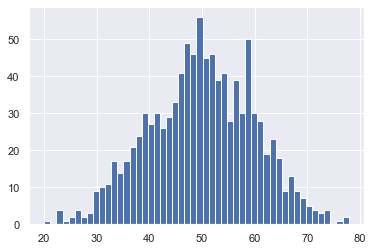

In [5]:
# 1,000人が受けたテストがあり、平均が50、標準偏差が10だったとして、それをヒストグラムに出すと

# 平均50、標準偏差10の正規乱数を1,000作成
x = np.random.normal(50,10,1000)

# ヒストグラム出力
plt.hist(x, bins=50)
# filename="hist2.png"
# plt.savefig(filbname)
plt.show()


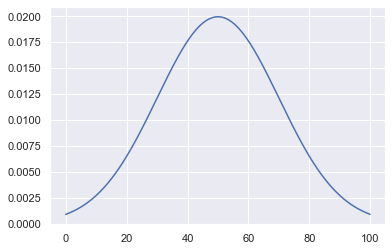

In [6]:
# 正規分布
from scipy.stats import norm

# 0から100まで、0.01感覚で入ったリストxを作成
x = np.arange(0,100,0.1)

# 確率密度関数にx、平均50、標準偏差20を代入
y = norm.pdf(x,50,20)

# x,yを引数にして、関数の色をr(red)に指定
plt.plot(x,y,color='b')
plt.show()

# 第7章 標本分布

In [7]:
# 中心極限定理とは
## 分布がどのようなものであっても、平均値μ分散σ^2をもつ母集団からとられた、
## 大きさnの標本の平均値x̄の分布は、nが大きくなるとき、正規分布N(μ,σ^2/n)に近づく。
## したがって、z=(x-μ)/(σ/√n)の分布は、nが大きくなるとき、標準正規分布N(0,1)に近づく。
## 平均μ、分散σ^2の母集団から取れた大きさnの標本の平均値x̄の期待値はμ、分散は、
## σ^2/nである。したがって、x̄の分散は標本数nに反比例し、標準偏差は√nに反比例する

## t分布

In [10]:
# Pr{-1.96 < (x̄-u)/(σ/√n) < 1.96} = 0.95
# Pr{x̄-1.96*σ/√n < μ < x̄+1.96*σ/√n} = 0.95
# 上記の式の意味は、道の母集団平均μの値が、↑の区間にあることが、95%確実であると推論できる

In [9]:
# t = (x̄-μ)/(σ/√n) ※σは標本標準偏差のため、バーがつく

# 第8章 推定

## 比率の区間推定

In [30]:
# n=標本数, x/n=相対頻度, P=母集団比率
# z= {(x/n)-P} / √p*q/n
# Pr{-1.96 < {(x/n)-P}/ (√p*q/n) < 1.96} = 0.95
## 例題：喫煙者400人をランダムに選んで、ある銘柄のたばこを1番好む人の数をしらべたところ、
## 95人であった。喫煙者全体の中でその銘柄を1番好むものの割合Pを、
## 信頼係数95%で区間推定してみよう

n = 400
x = 95
p = x/n
q = 1-p
a = 0.95

upper = x/n + ((p*q)/n)**(1/2)*norm.isf(1-a)
lower = x/n - ((p*q)/n)**(1/2)*norm.isf(1-a)
print('{}% interval: {:.2f}% < x < {:.2f}%\nE(x)={:.2f}%'.format(a*100,lower*100,upper*100,x/n*100))

95.0% interval: 20.25% < x < 27.25%
E(x)=23.75%


## 平均値の推定

In [32]:
# n=標本数, x = 標本平均, 標本標準偏差 = σ
# 母分散が未知の場合に、母集団平均値μの信頼係数95%の信頼区間の近似計算は
# サンプル数が30以上あたりからt分布ではなく正規分布を用いても問題ないとされている

# 正規分布を利用した求め方
n = 1000
x = 170
σ = 5
a = 0.95

upper = x + σ/n**(1/2)*norm.isf(1-a)
lower = x - σ/n**(1/2)*norm.isf(1-a)
print('{}% interval: {:.2f} < x < {:.2f}\nE(x)={:.2f}'.format(a*100,lower,upper,x))

95.0% interval: 169.74 < x < 170.26
E(x)=170.00


In [33]:
t_dist

In [31]:
# t分布を利用した求め方
from scipy import stats
t_dist = stats.t(loc=x,
                 scale=np.sqrt(σ**2/n),
                 df=n-1)
lower,upper = t_dist.interval(alpha=a)
print('{}% interval: {:.2f} < x < {:.2f}\nE(x)={:.2f}'.format(a*100,lower,upper,x))

95.0% interval: 94.51 < x < 95.49
E(x)=95.00


## 母分散の区間推定

In [21]:
# χ^2 = S / σ^2 (Sは平方和)
# S =  Σ(xi - x̄)^2 
# 自由度は(n-1)


## 標本の大きさの決定

In [24]:
# 比率を推定する場合
# n=(1.96/E)^2 * p * (1-q)
# Eは抑えたい誤差|x/n - P|である
## 例：ある電気器具メーカーが、自社のある製品を利用している家庭の割合を標本調査によって、
##　推定しようと考えている。信頼係数95%以上で、誤差を3%以内に抑えたいとすれば、
## 必要な標本数はどれくらい必要か求める
E = 0.03
p = 0.5 # 推定される確率
q = 1-p
# 必要な標本数は
n = (1.96/E)**2*p*q
print('必要な標本数は：',round(n,1))

必要な標本数は： 1067.1


In [10]:
# 平均値を推定する場合
## 例：ある第年の大学生の1ヶ月平均生活費を1,000円以内の誤差で推定する。
## ただし、母集団の標準偏差は約8,000円であると検討がつけられているとする。
## 信頼係数95%とすると
E = 1000
σ = 8000
a = 0.95
n = ((norm.isf(1-a)*σ)/(E))**2
print('必要な標本数は：',round(n,1))

必要な標本数は： 173.2


# 第9章 検定

## 2種類の誤り

正しい仮説を否定してしまう：第1種の誤り(=有意水準に一致) <br>
誤った仮説を承認してしまう：第2種の誤り(H1が正しいにも関わらず、検定統計量が棄却域に入らない)<br>
2群間での統計的手法まとめ<br>
https://www.jstage.jst.go.jp/article/kagakutoseibutsu/51/5/51_318/_pdf <br>
https://qiita.com/suaaa7/items/745ac1ca0a8d6753cf60 <br>

## 比率の差の検定

In [4]:
from scipy.stats import norm
# 標本比率
n1 = 1000
x1 = 45
p1 = x1/n1

n2 = 1000
x2 = 60
p2 = x2/n2
p = (x1+x2) / (n1+n2)

# 有意水準
a = [0.01,0.05,0.1,0.2]


# 検定仮説H0：p1 = p2 として、対立仮説H1：p1≠p2
z = (p1-p2) / (p*(1-p)*(1/n1+1/n2))**(1/2)

for i in a:
    if abs(z) > norm.isf(q=i/2): #両側検定なので 1/2倍としている
        print('有意水準',round(i*100),'%で帰無仮説を棄却する')
    else:
        print('有意水準',round(i*100),'%で帰無仮説を肯定する')

有意水準 1 %で帰無仮説を肯定する
有意水準 5 %で帰無仮説を肯定する
有意水準 10 %で帰無仮説を肯定する
有意水準 20 %で帰無仮説を棄却する


In [166]:
from scipy.stats import norm
# 標本比率
n1 = 357
x1 = 4.07
p1 = x1/n1

n2 = 4062-n1
x2 = 279.48-x1
p2 = x2/n2
p = (x1+x2) / (n1+n2)

# 有意水準
a = [0.01,0.05,0.1,0.2]


# 検定仮説H0：p1 = p2 として、対立仮説H1：p1≠p2
z = (p1-p2) / (p*(1-p)*(1/n1+1/n2))**(1/2)

for i in a:
    if abs(z) > norm.isf(q=i/2): #両側検定なので 1/2倍としている
        print('有意水準',round(i*100),'%で帰無仮説を棄却する')
    else:
        print('有意水準',round(i*100),'%で帰無仮説を肯定する')

有意水準 1 %で帰無仮説を棄却する
有意水準 5 %で帰無仮説を棄却する
有意水準 10 %で帰無仮説を棄却する
有意水準 20 %で帰無仮説を棄却する


In [167]:
z

-4.486610537645065

## 平均値差の検定(2標本のz検定)

In [59]:
# 平均値差の検定(2標本のz検定)
n1 = 100
x1 = 71
σ1 = 10

n2 = 100
x2 = 70
σ2 = 10

var1 = σ1**2 / n1
var2 = σ2**2 / n2


# 有意水準
a = [0.01,0.05,0.1,0.2]


# 検定仮説H0：x1 = x2 として、対立仮説H1：x1≠x2
z = (x1-x2) / np.sqrt((var1/n1)+(var2/n2))

for i in a:
    if abs(z) > norm.isf(q=i/2): #両側検定なので 1/2倍としている
        print('有意水準',round(i*100),'%で帰無仮説を棄却する')
    else:
        print('有意水準',round(i*100),'%で帰無仮説を肯定する')

有意水準 1 %で帰無仮説を棄却する
有意水準 5 %で帰無仮説を棄却する
有意水準 10 %で帰無仮説を棄却する
有意水準 20 %で帰無仮説を棄却する


## 母分散の比較

In [63]:
import scipy
scipy.stats.f.isf(1-0.95,9,9)

3.178893104458269

In [74]:
from scipy.stats import f
# ２つの母集団に対して、２つの母分散に違いがある調べることを目的とする

# 2つの母集団の平均
x1 = 100
x2 = 100

# 2つの母集団の不偏分散 v1 = Σ(x1i-x1)^2/(n1-1)
v1 = 3
v2 = 4

V = v1 / v2

# 有意水準
a = [0.01,0.05,0.1,0.2]

for i in a:
    if (abs(z) > f.ppf(1-i,n1-1,n2-1)) or (abs(z) < f.ppf(i,n1-1,n2-1)):
        print('有意水準',round(i*100),'%で帰無仮説を棄却する')
    else:
        print('有意水準',round(i*100),'%で帰無仮説を肯定する')

有意水準 1 %で帰無仮説を棄却する
有意水準 5 %で帰無仮説を棄却する
有意水準 10 %で帰無仮説を棄却する
有意水準 20 %で帰無仮説を棄却する


## ポアソン分布の検定

In [76]:
# 近似法：確率変数XがP0(λ)に従うとき、X+0.5は近似的に、N(λ,λ)に従う
# これにより、n単位あたりの欠点数をwとし、
# λ(^*) = (w+0.5) / nとすると、λ(^*)は近似的に、N(λ,λ/n)に従う

## U0 = λ(^*) - λ0 / (√λ0 / n)　を統計検定量とする

In [88]:
# 例：ある工場で鉄板を製造している。1㎡あたり3つの傷が発生。そこで、機械を改良し、
#    1㎡の試作品を１０枚作成したところ、合計で15個の傷が見つかった。
#    傷の発生確率が改善したかどうか統計的に検証したい

n = 10
w = 20
λ = (w+0.5)/10
λ0 = 3
U0 = (λ-λ0) / np.sqrt(λ0/n)
print('検定統計量U0：{:.3f}'.format(U0))

# 有意水準
a = [0.01,0.05,0.1,0.2]

for i in a:
    if abs(U0) > norm.isf(q=i/2): #両側検定なので 1/2倍としている
        print('有意水準',round(i*100),'%で帰無仮説を棄却する')
    else:
        print('有意水準',round(i*100),'%で帰無仮説を肯定する')

検定統計量U0：-1.734
有意水準 1 %で帰無仮説を肯定する
有意水準 5 %で帰無仮説を肯定する
有意水準 10 %で帰無仮説を棄却する
有意水準 20 %で帰無仮説を棄却する


### ポアソン分布のλの信頼区間

In [97]:
a = 0.05
upper = λ + norm.isf(a/2)*np.sqrt(λ/λ0)
lower = λ + norm.isf(1-a/2)*np.sqrt(λ/λ0)
print('{}% interval: {:.2f} < x < {:.2f}'.format(a*100,lower,upper))

5.0% interval: 0.43 < x < 3.67


# 第10章 分割表に関する検定

In [169]:
# 質的変数間の関係性を調べる場合、分割方が重要。分割表を通じて、質的変数間の違いを統計的に分析する
# 例：機械ABがあり、1級品~3級品までを生産している。帰無仮説のもとでは、
#    AもBも同じ確率で級品を製造すると考えているが、その点を検定する

df = pd.DataFrame([[55,40,5],[68,10,22]],
                  columns = ['grade1','grade2','grade3'],
                  index = ['A','B'])
df

,grade1,grade2,grade3
A,55,40,5
B,68,10,22


In [186]:
# 帰無仮説と対立仮説を設定する
# H0:p11=p21 かつ p12=p22 かつ p13=p23 
# H1:H0におけ等式の少なくとも1つは不等号
# 期待度数を算出

index_num = []
grade_num = []

for i in df.index:
    index_num.append(sum(df.loc[i]))

for i in df.columns:
    grade_num.append(sum(df[i]))
    

df_index = np.array(index_num*3).reshape(2,3)
df_grade = np.array(grade_num*2).reshape(2,3)

# 期待度数を算出
df_expected = pd.DataFrame(df_grade/200 * df_index,
                          columns = ['grade1','grade2','grade3'],
                          index = ['A','B'])
# 検定統計量χ^2を算出
df_X0 = (df - df_expected)**2/ df_expected
X0 = sum(df_X0.sum())

df_num = (len(df.index)-1) * (len(df.columns)-1)
# p値を算出
p = 1 - st.chi2.cdf(x = X0,df = df_num)
p

2.942477546064026e-07

In [190]:
# 1発で算出する方法
chi2, p, dof, ef =st.chi2_contingency(np.array([[55,40,5],[68,10,22]]),
                                         correction=False)
print('χ^2統計量：{:.3f}\np値：{}\n自由度：{}\n期待度数：{}'.format(chi2, p, dof, ef))

χ^2統計量：30.078
p値：2.942477545972555e-07
自由度：2
期待度数：[[61.5 25.  13.5]
 [61.5 25.  13.5]]


# 11章分散分析

In [193]:
# 統計モデルを推定するライブラリ
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats.anova as anova # 分散分析のライブラリ
from statsmodels.stats.multicomp import pairwise_tukeyhsd # Tukeyの多重比較するライブラリ

In [197]:
# データセットの作成
W = np.array([66, 62, 80, 50, 57, 68, 73, 65])
X = np.array([62, 60, 66, 63, 55, 53, 59, 63])
Y = np.array([65, 60, 78, 52, 59, 66, 73, 64])
Z = np.array([52, 59, 44, 67, 47, 53, 58, 49])

tdata = pd.DataFrame({'W':W,'X':X,'Y':Y,'Z':Z})
tdata.head()
print(tdata.describe())

              W         X          Y          Z
count   8.00000   8.00000   8.000000   8.000000
mean   65.12500  60.12500  64.625000  53.625000
std     9.23406   4.35685   8.140507   7.443837
min    50.00000  53.00000  52.000000  44.000000
25%    60.75000  58.00000  59.750000  48.500000
50%    65.50000  61.00000  64.500000  52.500000
75%    69.25000  63.00000  67.750000  58.250000
max    80.00000  66.00000  78.000000  67.000000


In [199]:
tdata_trans = tdata.transpose()
tdata_trans.head()

,0,1,2,3,4,5,6,7
W,66,62,80,50,57,68,73,65
X,62,60,66,63,55,53,59,63
Y,65,60,78,52,59,66,73,64
Z,52,59,44,67,47,53,58,49


In [201]:
# 正規性の検定：Shapiro-Wilk検定(統計量、p値)
st.shapiro(tdata) 
## この検定の帰無仮説は、データが正規分布に従っているという仮説である。

(0.982, 0.862)

In [202]:
# 等分散性の検定：Bartlett検定
st.bartlett(tdata['W'],tdata['X'],tdata['Y'],tdata['Z'])
## この検定の帰無仮説は複数の群からなる標本について、分散が各群とも等しいという仮説である。

BartlettResult(statistic=3.5539244341193403, pvalue=0.3138353536500928)

## 対応なしの一元配置分散分析

In [204]:
f, p = st.f_oneway(tdata['W'],tdata['X'],tdata['Y'],tdata['Z'])
print('F=%f, p-value=%f'%(f,p))

F=4.024871, p-value=0.016860


分散分析の結果　p < 0.05 より <br>
「4つの学校のテストの得点の平均に差はない」という帰無仮説が棄却されました．<br>
したがって４つの学校のテストの得点の平均に差がないとは言えない,<br>
つまり、学校の違いがテストの得点に影響を及ぼしている可能性がある

#### 多重比較(Tukeyの検定)

In [207]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# 関数(グループの羅列, グループ名)

def tukey_hsd(ind, *args):
    # 第1引数：名称のリスト(index) , 第2引数以降：　データ(*args:複数の引数をタプルとして受け取る)
    data_arr = np.hstack( args )
    # 配列の結合をhstackでしているらしい、水平位方向k(新しく列を増やしている方向)に結合
    ind_arr = np.array([])
    for x in range(len(args)):
        ind_arr = np.append(ind_arr, np.repeat(ind[x], len(args[x])))
    # ind_arrの配列の最後にnp.repeat ()を加える
    # np.repeat(A,N)は配列A内の各要素をN回繰り返す
    
    print(pairwise_tukeyhsd(data_arr,ind_arr))

In [208]:
tukey_hsd(list('WXYZ'),W,X,Y,Z)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     W      X     -5.0  0.547 -15.2598  5.2598  False
     W      Y     -0.5    0.9 -10.7598  9.7598  False
     W      Z    -11.5 0.0236 -21.7598 -1.2402   True
     X      Y      4.5 0.6203  -5.7598 14.7598  False
     X      Z     -6.5 0.3279 -16.7598  3.7598  False
     Y      Z    -11.0 0.0321 -21.2598 -0.7402   True
-----------------------------------------------------


WとZの間、YとZの間に得点のの有意差がある

Text(0, 0.5, 'score')

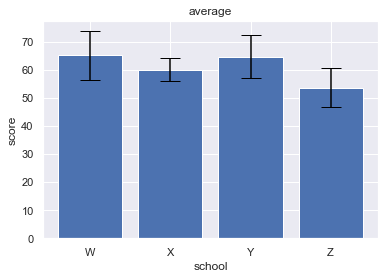

In [210]:
left = np.array(['W','X','Y','Z'])
height = np.array(np.mean(tdata))
yerr = np.array(np.std(tdata))
plt.bar(left,height,yerr=yerr,ecolor='black',capsize=10)
plt.title('average')
plt.xlabel('school')
plt.ylabel('score')

## 対応なしの二元配置分散分析

In [212]:
# 統計モデルを推定するライブラリ
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats.anova as anova # 分散分析を行うライブラリ
from statsmodels.stats.multicomp import pairwise_tukeyhsd # Tukeyの多重比較やるライブラリ

from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [216]:
data = pd.read_csv('runtime.csv',encoding = 'utf8')
data.head()

,Unnamed: 0,ShoesMaker,Track,Time
0,0,A,Ground,15.624345
1,1,A,Ground,13.388244
2,2,A,Ground,13.471828
3,3,A,Ground,12.927031
4,4,A,Ground,14.865408


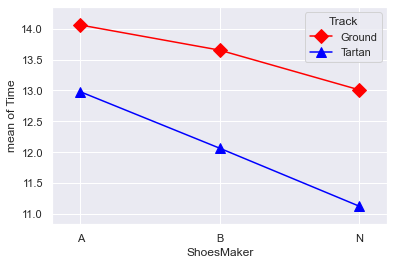

In [220]:
fig = interaction_plot(data.ShoesMaker, data.Track, data.Time,
                       # (横軸にする要因（水準多い方），系列にする要因（水準少ない方），評価指標)
                      colors=['red','blue'], markers=['D','^'],ms=10)

In [222]:
# 二元配置分散分析の実施
formula = 'Time ~ (Track) + (ShoesMaker) + (Track):(ShoesMaker)'
model = ols(formula, data).fit()
aov_table = anova_lm(model, typ=2)
# aov_table.columns = ['平方和','自由度','F値','p値']　#列名を日本語に差し替え
print(aov_table)

                      sum_sq     df           F        PR(>F)
Track             345.591633    1.0  344.753535  4.987607e-61
ShoesMaker        211.505336    2.0  105.496206  6.228932e-40
Track:ShoesMaker   16.505274    2.0    8.232623  2.973539e-04
Residual          595.444018  594.0         NaN           NaN


シューズやトラックで主効果がみられました．さらにシューズ条件とトラック条件の間で交互作用がみられました（ p < 0.05）。<br>
交互作用がみられた場合，全群の多重比較を実施していくのが王道．<br>
交互作用が無かった場合は，各要因ごとの水準間の平均値で（他方の要因は一旦置いといて）群間比較すれば良い。

### 交互作用あり→全軍の多重比較(シューズA時のトラックの違いのみ)

In [241]:
MakerAtrackG = data[(data.ShoesMaker=='A')&(data.Track=='Ground')]
MakerAtrackT = data[(data.ShoesMaker=='A')&(data.Track=='Tartan')]
MakerAtrackG.head()

,Unnamed: 0,ShoesMaker,Track,Time
0,0,A,Ground,15.624345
1,1,A,Ground,13.388244
2,2,A,Ground,13.471828
3,3,A,Ground,12.927031
4,4,A,Ground,14.865408


In [251]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
def tukey_hsd(ind, *args):
    # 第1引数：名称のリスト(index) , 第2引数以降：　データ(*args:複数の引数をタプルとして受け取る)
    data_arr = np.hstack( args )
    # 配列の結合をhstackでしているらしい、水平位方向k(新しく列を増やしている方向)に結合
    ind_arr = np.array([])
    for x in range(len(args)):
        ind_arr = np.append(ind_arr, np.repeat(ind[x], len(args[x])))
    # ind_arrの配列の最後にnp.repeat ()を加える
    # np.repeat(A,N)は配列A内の各要素をN回繰り返す
    
    print(pairwise_tukeyhsd(data_arr,ind_arr))

In [252]:
tukey_hsd(list('GT'),MakerAtrackG['Time'],MakerAtrackT['Time'])

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     G      T  -1.0809 0.001 -1.3553 -0.8066   True
---------------------------------------------------


# 第12章主成分分析

主成分分析とは、多くの量的変数が存在している場合に、それらの間の相関構造を考慮して、<br>
低い次元の合成変数(主成分)に変換し、データが有している情報をより解釈しやすくするための方法である

In [23]:
# URLによるリソースへのアクセスを提供するライブラリをインポートする
import urllib.request
import sklearn
from sklearn.decomposition import PCA

In [24]:
# url = "https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/wine.txt"
# urllib.request.urlretrieve(url, '../statistics/wine.txt') 
df = pd.read_csv('wine.txt', sep='\t', index_col=0)
df.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


/Users/satomitakei/.pyenv/versions/3.7.0/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/satomitakei/.pyenv/versions/3.7.0/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/satomitakei/.pyenv/versions/3.7.0/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1,

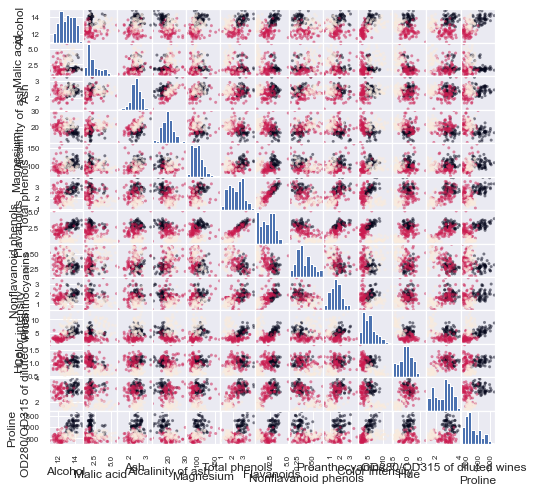

In [25]:
from pandas import plotting
plotting.scatter_matrix(df.iloc[:,1:], figsize=(8,8), c=list(df.iloc[:, 0]),
                       alpha=0.5)
plt.show()

In [26]:
# 行列の標準化
dfs = df.iloc[:,1:].apply(lambda x: (x-x.mean())/x.std(),axis= 0)
dfs.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767


In [27]:
# 主成分分析
pca = PCA()
feature = pca.fit(dfs)
# データを主成分空間に写像
feature = pca.transform(dfs)

# 主成分得点
pd.DataFrame(feature, columns=['PC{}'.format(x + 1) for x in range(len(dfs.columns))]).head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,3.307421,-1.439402,-0.165273,-0.215025,0.691093,-0.223250,0.594749,0.064956,0.639638,1.018084,-0.450293,0.539289,-0.066052
1,2.203250,0.332455,-2.020757,-0.290539,-0.256930,-0.924512,0.053624,1.021534,-0.307978,0.159252,-0.142256,0.387146,0.003626
2,2.509661,-1.028251,0.980054,0.722863,-0.250327,0.547731,0.423012,-0.343248,-1.174521,0.113042,-0.285866,0.000582,0.021655
3,3.746497,-2.748618,-0.175696,0.566386,-0.310964,0.114109,-0.382259,0.641783,0.052397,0.238739,0.757448,-0.241339,-0.368444
4,1.006070,-0.867384,2.020987,-0.408613,0.297618,-0.405376,0.442825,0.415528,0.325900,-0.078146,-0.524466,-0.216055,-0.079140


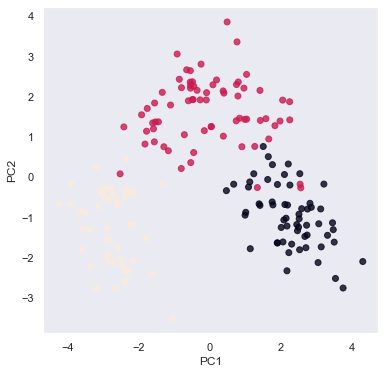

TypeError: 'NoneType' object is not callable

In [28]:
# 第1主成分と第2主成分でプロットする
plt.figure(figsize=(6,6))
plt.scatter(feature[:,0], feature[:,1], alpha=0.8,c=list(df.iloc[:,0]))
plt.grid()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()()

In [ ]:
from pandas import plotting 
plotting.scatter_matrix(pd.DataFrame(feature, 
                        columns=["PC{}".format(x + 1) for x in range(len(dfs.columns))]), 
                        figsize=(8, 8), c=list(df.iloc[:, 0]), alpha=0.5) 
plt.show()

In [ ]:
# 寄与率
pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

In [ ]:
# 累積寄与率を図示する
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()

In [ ]:
# PCA の固有値
pd.DataFrame(pca.explained_variance_, index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

In [ ]:
# PCA の固有ベクトル
pd.DataFrame(pca.components_, columns=df.columns[1:], index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

In [ ]:
# 第一主成分と第二主成分における観測変数の寄与度をプロットする
plt.figure(figsize=(6, 6))
for x, y, name in zip(pca.components_[0], pca.components_[1], df.columns[1:]):
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_[1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# 第13章クラスター分析
クラスター分析とは、対象感の距離を定義して、距離の近さによって、対象を分類する方法の総称である。

In [34]:
df_raw = pd.read_csv('wine.txt', sep='\t', index_col=0)
df_raw.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [43]:
from sklearn.cluster import KMeans
df = df_raw.drop(columns = 'class')
df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,y_pred
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


In [46]:
pred = KMeans(n_clusters=3).fit_predict(df)
df_raw['pred'] = pred
df_raw

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,y_pred,pred
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2,0
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2,0
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2,0
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2,0


# 第14章時系列分析

In [124]:
# グラフを縦長にする
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6

#統計モデル
import statsmodels.api as sm

In [135]:
df_raw = pd.read_csv('monthly_cv.csv')
df_raw['cv'] = df_raw['cv'].astype(int)
df_raw.head()

,month,cv
0,2016/01,247
1,2016/02,374
2,2016/03,293
3,2016/04,248
4,2016/05,293


In [136]:
# 日付形式で読み込む(dtype=floatで読み込まないと、あとでARIMAモデル推定時にエラーとなる)
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y/%m')
df = pd.read_csv('monthly_cv.csv', index_col='month',
                 date_parser=dateparse, dtype='float')
df.head()

/Users/satomitakei/.pyenv/versions/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


,cv
month,
2016-01-01,247.0
2016-02-01,374.0
2016-03-01,293.0
2016-04-01,248.0
2016-05-01,293.0


In [137]:
# データの取得方法その1
ts = df['cv']
# データの取得方法その2
from datetime import datetime
ts[datetime(2016,1, 1)]

# 2016年のデータをすべて取ってくる
ts['2016']

month
2016-01-01    247.0
2016-02-01    374.0
2016-03-01    293.0
2016-04-01    248.0
2016-05-01    293.0
2016-06-01    310.0
2016-07-01    286.0
2016-08-01    306.0
2016-09-01    356.0
2016-10-01    421.0
2016-11-01    471.0
2016-12-01    477.0
Name: cv, dtype: float64

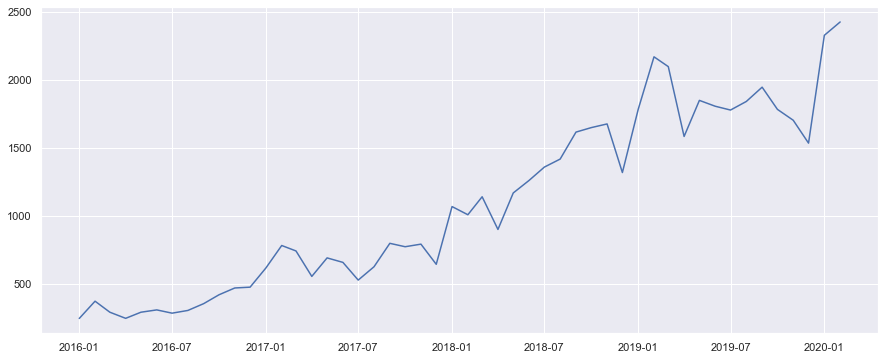

In [139]:
plt.plot(ts)

In [142]:
# 差分系列
ts.diff().head()

month
2016-01-01      NaN
2016-02-01    127.0
2016-03-01    -81.0
2016-04-01    -45.0
2016-05-01     45.0
Name: cv, dtype: float64

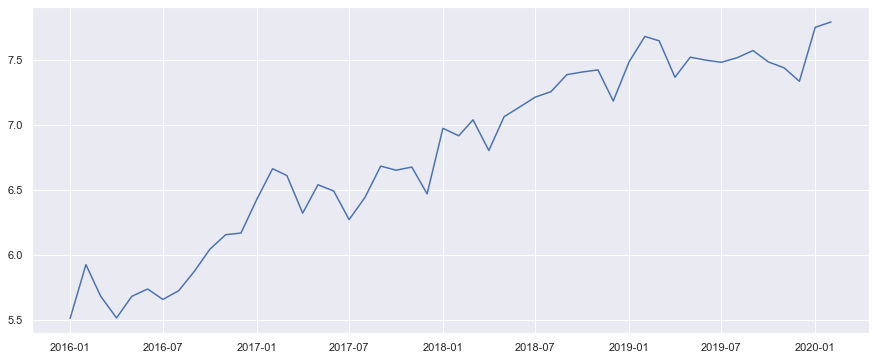

In [146]:
# 対数差分系列
log_diff = np.log(ts) - np.log(ts.shift())
plt.plot(np.log(ts))

### 自己相関係数の推定

In [147]:
# 自己相関を求める
ts_acf = sm.tsa.stattools.acf(ts, nlags=40)
ts_acf

array([ 1.   ,  0.885,  0.798,  0.777,  0.761,  0.706,  0.649,  0.592,
        0.546,  0.464,  0.413,  0.394,  0.339,  0.232,  0.172,  0.148,
        0.104,  0.046, -0.014, -0.071, -0.115, -0.17 , -0.212, -0.229,
       -0.263, -0.305, -0.349, -0.35 , -0.372, -0.391, -0.412, -0.412,
       -0.402, -0.401, -0.395, -0.369, -0.376, -0.377, -0.351, -0.316,
       -0.306])

In [148]:
# 偏自己相関
ts_pacf = sm.tsa.stattools.pacf(ts, nlags=40, method='ols')
ts_pacf

array([ 1.   ,  0.974,  0.19 ,  0.365,  0.524, -0.158,  0.259, -0.068,
        0.004, -0.449,  0.293,  0.467,  0.553, -0.576,  0.013,  0.099,
        0.458,  0.778, -0.029, -0.12 ,  0.233,  0.337,  0.295,  1.015,
        2.116, -1.548,  0.334,  0.399, -0.52 , -0.614, -0.433, -0.131,
       -0.055, -0.185, -0.168,  0.142,  0.309,  0.055, -0.018,  0.107,
        0.049])

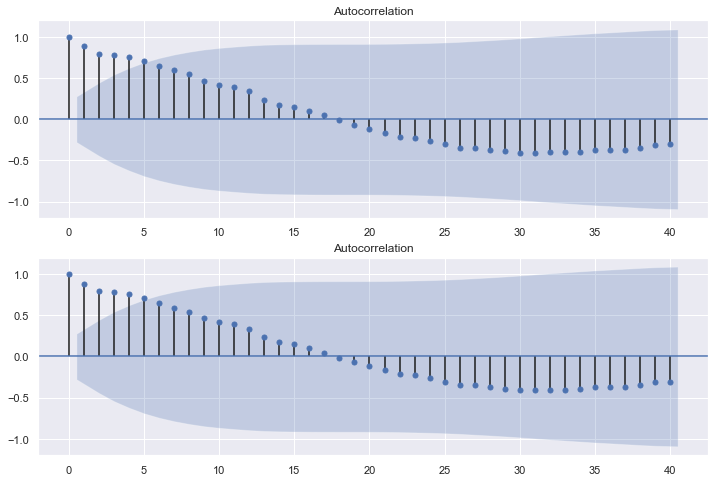

In [151]:
# 自己相関のグラフ
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_acf(ts,lags=40,ax=ax2)

### ARIMAモデルの推定

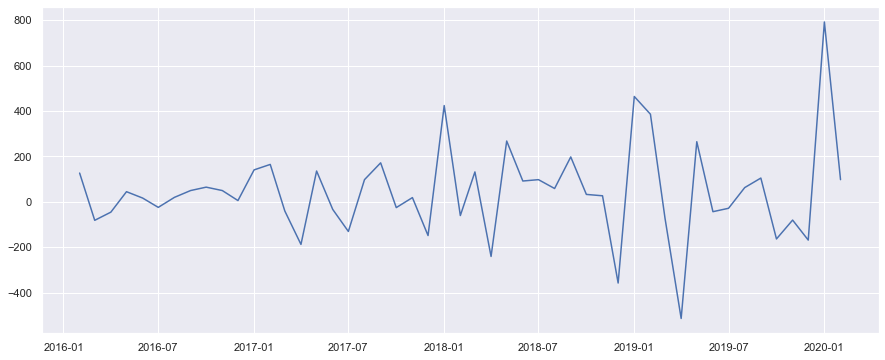

In [153]:
# 和分過程なので、差分を取る
diff = ts-ts.shift()
diff = diff.dropna()
plt.plot(diff)

In [161]:
# 差分系列への自動ARMA推定関数の実行
resDiff = sm.tsa.arma_order_select_ic(diff,ic='aic',trend='nc')
resDiff

/Users/satomitakei/.pyenv/versions/3.7.0/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


{'aic':             0           1           2
 0         NaN  665.109951  665.345678
 1  665.980436  666.038582  667.340798
 2  665.193398  665.851690  658.936890
 3  662.600744  657.404381  659.398324
 4  660.593558  659.396207  684.434885,
 'aic_min_order': (3, 1)}

In [160]:
from statsmodels.tsa.arima_model import ARIMA
ARIMA_3_1_2 = ARIMA(ts, order=(3, 1, 1)).fit(dist=False)
ARIMA_3_1_2.params

/Users/satomitakei/.pyenv/versions/3.7.0/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/satomitakei/.pyenv/versions/3.7.0/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/satomitakei/.pyenv/versions/3.7.0/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/satomitakei/.pyenv/versions/3.7.0/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/satomitakei/.pyenv/versions/3.7.0/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:690: RuntimeWarning: ove

const         39.448232
ar.L1.D.cv    -0.991592
ar.L2.D.cv    -0.638660
ar.L3.D.cv    -0.647068
ma.L1.D.cv     0.862104
dtype: float64

/Users/satomitakei/.pyenv/versions/3.7.0/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


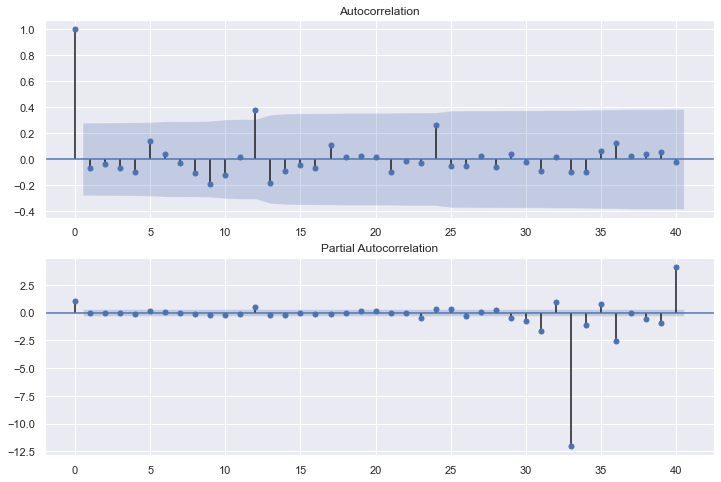

In [162]:
# 残差のチェック
# SARIMAじゃないので、周期性が残ってしまっている。。。
resid = ARIMA_3_1_2.resid
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

### SARIMAモデルの推定
季節変動ありのARIMAモデル

In [163]:
import statsmodels.api as sm
SARIMA_3_1_2_111 = sm.tsa.SARIMAX(ts, order=(3,1,2), 
                                  seasonal_order=(1,1,1,12)).fit()
print(SARIMA_3_1_2_111.summary())

/Users/satomitakei/.pyenv/versions/3.7.0/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/satomitakei/.pyenv/versions/3.7.0/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/satomitakei/.pyenv/versions/3.7.0/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:901: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:]**2).mean()
/Users/satomitakei/.pyenv/versions/3.7.0/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


                                      SARIMAX Results                                       
Dep. Variable:                                   cv   No. Observations:                   50
Model:             SARIMAX(3, 1, 2)x(1, 1, [1], 12)   Log Likelihood                -235.586
Date:                              Thu, 26 Mar 2020   AIC                            487.172
Time:                                      15:14:26   BIC                            500.059
Sample:                                  01-01-2016   HQIC                           491.715
                                       - 02-01-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7795      0.794     -0.982      0.326      -2.335       0.776
ar.L2         -0.09

/Users/satomitakei/.pyenv/versions/3.7.0/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


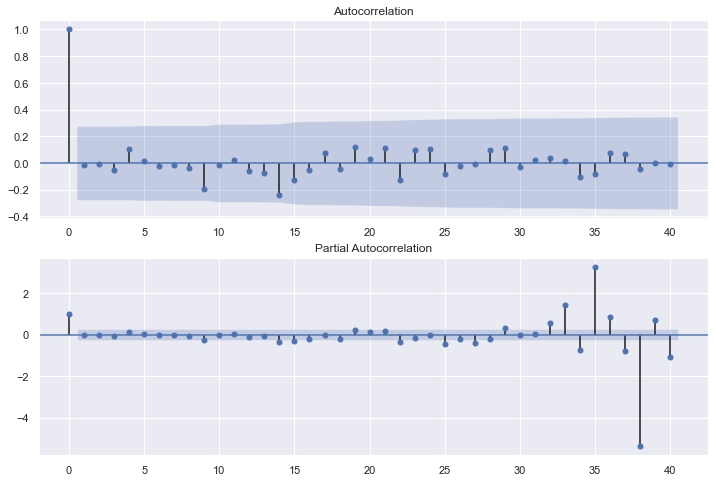

In [164]:
# 残渣のチェック
residSARIMA = SARIMA_3_1_2_111.resid
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(residSARIMA.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(residSARIMA, lags=40, ax=ax2)


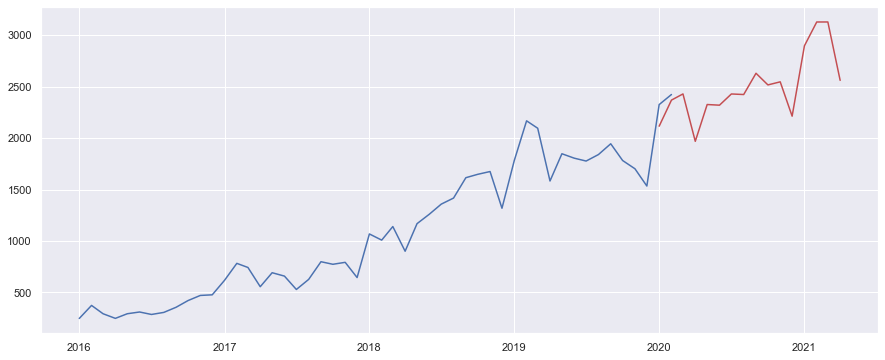

In [168]:
# 予測
pred = SARIMA_3_1_2_111.predict('2020-01-01', '2021-04-01')

# 実データと予測結果の図示
plt.plot(ts)
plt.plot(pred, "r")

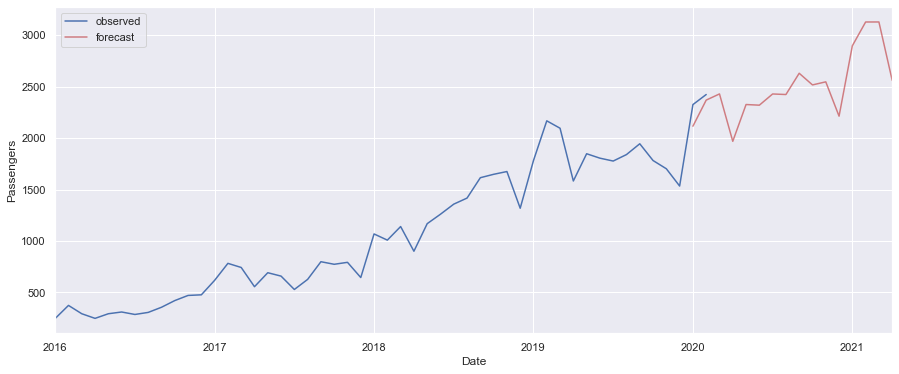

In [194]:
# 折れ線の描画
ts['2016-01-01':].plot(label='observed')
pred.plot(label='forecast', alpha=.7, color = "r")
 
# 区間予測の描画
# plt.fill_between(pred.index,
#                 pred.iloc[:, 0],
#                 pred.iloc[:, 1], color='r', alpha=.2)
 
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend();

In [181]:
round(pred,0)

2020-01-01    2117.0
2020-02-01    2371.0
2020-03-01    2431.0
2020-04-01    1970.0
2020-05-01    2328.0
2020-06-01    2321.0
2020-07-01    2430.0
2020-08-01    2425.0
2020-09-01    2632.0
2020-10-01    2518.0
2020-11-01    2548.0
2020-12-01    2214.0
2021-01-01    2899.0
2021-02-01    3130.0
2021-03-01    3131.0
2021-04-01    2563.0
Freq: MS, dtype: float64

In [170]:
# 総当たりで、AICが最小となるSARIMAの次数を探す
max_p = 3
max_q = 3
max_d = 1
max_sp = 1
max_sq = 1
max_sd = 1

pattern = max_p*(max_q + 1)*(max_d + 1)*(max_sp + 1)*(max_sq + 1)*(max_sd + 1)

modelSelection = pd.DataFrame(index=range(pattern), columns=["model", "aic"])
pattern

192

In [182]:
# # 自動SARIMA選択
# num = 0

# for p in range(1, max_p + 1):
#     for d in range(0, max_d + 1):
#         for q in range(0, max_q + 1):
#             for sp in range(0, max_sp + 1):
#                 for sd in range(0, max_sd + 1):
#                     for sq in range(0, max_sq + 1):
#                         sarima = sm.tsa.SARIMAX(
#                             ts, order=(p,d,q), 
#                             seasonal_order=(sp,sd,sq,12), 
#                             enforce_stationarity = False, 
#                             enforce_invertibility = False
#                         ).fit()
#                         modelSelection.loc[num]["model"] = "order=(" + str(p) + ","+ str(d) + ","+ str(q) + "), season=("+ str(sp) + ","+ str(sd) + "," + str(sq) + ")"
#                         modelSelection.loc[num]["aic"] = sarima.aic
#                         num = num + 1

In [173]:
# AIC最小モデル
modelSelection[modelSelection.aic == min(modelSelection.aic)]

,model,aic
63,"order=(1,1,3), season=(1,1,1)",275.286


In [175]:
bestSARIMA = sm.tsa.SARIMAX(ts, order=(3,1,3), seasonal_order=(0,1,1,12), enforce_stationarity = False, enforce_invertibility = False).fit()
print(bestSARIMA.summary())

/Users/satomitakei/.pyenv/versions/3.7.0/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/satomitakei/.pyenv/versions/3.7.0/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                      SARIMAX Results                                       
Dep. Variable:                                   cv   No. Observations:                   50
Model:             SARIMAX(3, 1, 3)x(0, 1, [1], 12)   Log Likelihood                -369.197
Date:                              Thu, 26 Mar 2020   AIC                            754.394
Time:                                      15:25:54   BIC                            762.750
Sample:                                  01-01-2016   HQIC                           756.207
                                       - 02-01-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8365         -0        inf      0.000      -0.837      -0.837
ar.L2         -0.83

/Users/satomitakei/.pyenv/versions/3.7.0/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


/Users/satomitakei/.pyenv/versions/3.7.0/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


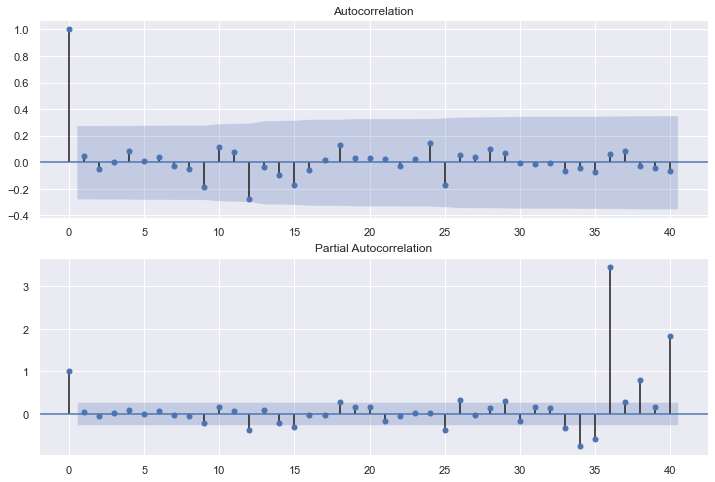

In [176]:
# 残差のチェック
residSARIMA = bestSARIMA.resid
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(residSARIMA, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(residSARIMA, lags=40, ax=ax2)

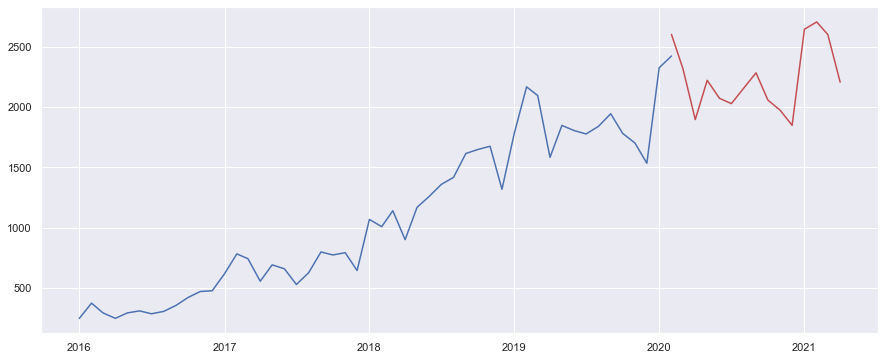

In [180]:
# 予測
bestPred = bestSARIMA.predict('2020-02-01', '2021-04-01')
# 実データと予測結果の図示
plt.plot(ts)
plt.plot(bestPred, "r")

In [189]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools
 
# 各パラメータの範囲を決める
p = d = q = range(0, 3)
sp = sd = sq = range(0, 2)
 
# p, d, q　の組み合わせを列挙するリストを作成
pdq = list(itertools.product(p, d, q))
 
# P, D, Q　の組み合わせを列挙するリストを作成すると同時に、後ろに　s = 12　を決め打ちでつけている。
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(sp, sd, sq))]


In [191]:
import warnings
 
warnings.filterwarnings("ignore") # warnings を表示させないようにする
 
 
best_result = [0, 0, 10000000]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(train,
                          order = param,
                          seasonal_order=param_seasonal,
                          enforce_stationarity=True,
                          enforce_invertibility=True)
 
            results = mod.fit()
             
            print('order{}, s_order{} - AIC: {}'.format(param, param_seasonal, results.aic))
 
            if results.aic & lt;best_result[2]:
                best_result = [param, param_seasonal, results.aic]
        except:
            continue
             
print('\AICが最も良いモデル:', best_result)

SyntaxError: invalid syntax (<ipython-input-191-56cdd88f8229>, line 20)

In [190]:
mod = SARIMAX(train,
              order=(2, 1, 1),
              #order = best_result[0],
              seasonal_order=(1, 0, 1, 12), 
              #seasonal_order=best_result[1],
              enforce_stationarity=True,
              enforce_invertibility=True)
 
results = mod.fit()
 
print(results.summary())

NameError: name 'train' is not defined

# 第15章線形計画法

例題:
チキンカレーと親子丼を作って売る。売り上げを最大にする。<br>
材料は<br>
- 鶏肉50gのカタマリ：10個<br>
- 玉ねぎ50gのカタマリ:8個<br>
カレーは、鶏肉を1個と玉ねぎを2個消費する<br>
親子丼は、鶏肉を2個と玉ねぎを1個消費する<br>
<br>
売上は<br>
- カレー：200円<br>
- 親子丼：300円<br>


【制約条件】<br>
x1 + 2x2 ≦ 10
2x1 + x2 ≦ 8
x1>0, x2>0

【目的関数】
f = 200x1 + 300x2

In [6]:
import pulp

# 線形計画法の定義
problem = pulp.LpProblem('Curry_Oyako', pulp.LpMaximize)
## 最小化したいときは、pulp.LpMinimize

# 変数の定義
curry = pulp.LpVariable('curry', 0, 10, 'Integer')
oyako = pulp.LpVariable('oyako', 0, 10, 'Integer')
# 引数は、float型連続値'Continuous'、2値変数'Binary'が指定できる

# 目的関数の定義
problem += 2*curry + 3*oyako

# 制約条件の定義
problem += curry + 2*oyako <=10
problem += 2*curry + oyako <=8

# 解く
status = problem.solve()
print(pulp.LpStatus[status])

# 結果表示
print('Result')
print('curry:',curry.value())
print('oyako:',oyako.value())

Optimal
Result
curry: 2.0
oyako: 4.0


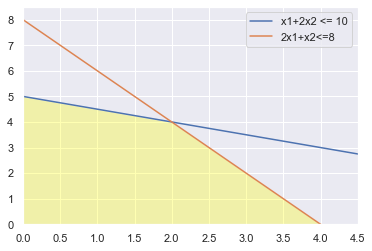

In [7]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 5, 100)

y1 = 5 - 0.5*x
y2 =  8 - 2*x
y3 = np.zeros_like(x)

y4 = np.minimum(y1, y2)

plt.figure()
plt.plot(x, y1, label="x1+2x2 <= 10")
plt.plot(x, y2, label="2x1+x2<=8")
plt.fill_between(x, y3, y4, where=y4>y3, facecolor='yellow', alpha=0.3)
plt.ylim(0, 8.5)
plt.xlim(0, 4.5)
plt.legend(loc=0)

plt.show()